In [ ]:
import gym
import random
from keras import Sequential
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.activations import relu, linear

import numpy as np
env = gym.make('MountainCar-v0')
env.seed(110)
np.random.seed(10)


In [ ]:
class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1.0 #
        self.gamma = .95
        self.batch_size = 64
        self.epsilon_min = .01 #
        self.lr = 0.001
        self.epsilon_decay = .995 #
        self.memory = deque(maxlen=100000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(20, input_dim=self.state_space, activation=relu))
        model.add(Dense(25, activation=relu))
        model.add(Dense(self.action_space, activation=linear))
        model.compile(loss='mse', optimizer=Adam(lr=self.lr))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state): # epsilon greedy policy

        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)

        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay



In [ ]:

def train_dqn(episode):

    loss = []
    agent = DQN(env.action_space.n, env.observation_space.shape[0])
    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 2))
        score = 0
        max_steps = 1000
        for i in range(max_steps):
            action = agent.act(state)
            env.render()
            next_state, reward, done, _ = env.step(action)
            reward = get_reward(next_state)
            score += reward
            next_state = np.reshape(next_state, (1, 2))
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)
    return loss



In [ ]:

def random_policy(episode, step):

    for i_episode in range(episode):
        env.reset()
        for t in range(step):
            env.render()
            action = env.action_space.sample()
            state, reward, done, info = env.step(action)
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                break
            print("Starting next episode")



Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Discrete(3)


/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step
episode: 33/60, score: 67.16462787698175
1/1 [==============================] - 0s 22ms/step
Car has reached the goal
episode: 34/60, score: 80.2965945167324
1/1 [==============================] - 0s 20ms/step
episode: 35/60, score: 73.27653438381218
1/1 [==============================] - 0s 32ms/step
episode: 36/60, score: 63.01838095096687
1/1 [==============================] - 0s 24ms/step
episode: 37/60, score: 55.617620855300125
1/1 [==============================] - 0s 19ms/step
episode: 38/60, score: 54.520425360857104
1/1 [==============================] - 0s 20ms/step
episode: 39/60, score: 70.63824701194339
1/1 [==============================] - 0s 31ms/step
episode: 40/60, score: 46.815571193061636
1/1 [==============================] - 0s 24ms/step
episode: 41/60, score: 55.30899071051792
1/1 [==============================] - 0s 19ms/step
episode: 42/60, score: 53.7110890

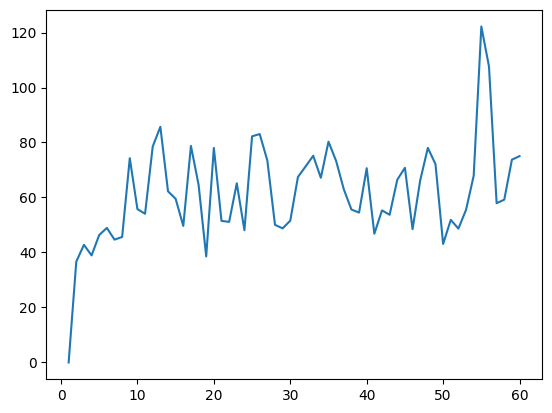

In [ ]:

if __name__ == '__main__':

    print(env.observation_space)
    print(env.action_space)
    episodes = 60
    loss = train_dqn(episodes)
    plt.plot([i+1 for i in range(episodes)], loss)
    plt.show()